<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####

from tensorflow.keras.datasets import boston_housing

In [2]:
# Load the Data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [3]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (404, 13)
y_train shape:  (404,)


In [4]:
X_train[1]

array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
       7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
       1.4700e+01, 3.9538e+02, 3.1100e+00])

In [5]:
y_train[1]

42.3

In [15]:
 #Normalize the data (all features should have roughly the same scale)
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)


In [27]:
print(X_train_minmax.shape)
X_train_minmax[:2]

(404, 13)


array([[1.37816304e-02, 0.00000000e+00, 2.81524927e-01, 0.00000000e+00,
        3.14814815e-01, 4.99806352e-01, 9.14521112e-01, 2.97191228e-01,
        1.30434783e-01, 2.27533461e-01, 8.93617021e-01, 1.00000000e+00,
        4.68818985e-01],
       [1.73654275e-04, 8.25000000e-01, 5.75513196e-02, 0.00000000e+00,
        6.17283951e-02, 7.84082107e-01, 1.31822863e-01, 5.36536996e-01,
        4.34782609e-02, 3.05927342e-01, 2.23404255e-01, 9.96167230e-01,
        3.80794702e-02]])

In [28]:
print(X_test_minmax.shape)
X_test_minmax[:2]

(102, 13)


array([[0.20319551, 0.        , 0.64662757, 0.        , 0.60493827,
        0.55635167, 1.        , 0.07359588, 1.        , 0.91395793,
        0.80851064, 0.06790559, 0.75386313],
       [0.00131471, 0.        , 0.35007331, 0.        , 0.33333333,
        0.45546088, 0.92687951, 0.12773597, 0.2173913 , 0.4665392 ,
        0.55319149, 0.99508296, 0.3995585 ]])

In [20]:
#Import the type of model and layers that you will need from Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

np.random.seed(812)

In [76]:
#Instantiate a model object and use model.add() to add layers to your model
#Since this is a regression model you will have a single output node in the final layer.
#Use activation functions that are appropriate for this task
#define Model


model = Sequential()
model.add(Dense(64, input_dim = 13, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

#compile the model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
 


In [77]:
#Fit your model and report its accuracy in terms of Mean Squared Error
hist = model.fit(X_train_minmax, y_train, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
13/13 [==============================] - 0s 10ms/step - loss: 574.7212 - accuracy: 0.0000e+00 - val_loss: 2931.6765 - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 545.7730 - accuracy: 0.0000e+00 - val_loss: 30761.1738 - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 499.2091 - accuracy: 0.0000e+00 - val_loss: 135889.2656 - val_accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 422.3084 - accuracy: 0.0000e+00 - val_loss: 503225.1875 - val_accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 312.8817 - accuracy: 0.0000e+00 - val_loss: 1547848.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 202.2928 - accuracy: 0.0000e+00 - val_loss: 3756877.7500 - val_accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 4ms/step

In [78]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [79]:
# evaluate the model
scores = model.evaluate(X_train_minmax, y_train)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

13/13 [==============================] - 0s 1ms/step - loss: 13.4705 - accuracy: 0.0000e+00
accuracy: 0.0


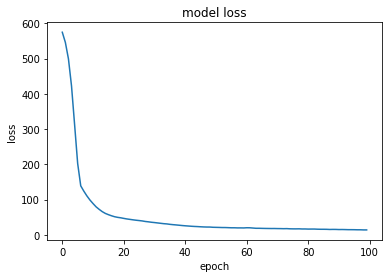

In [80]:
#Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
# summarize history for loss
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [72]:
#Run this same data through a linear regression model. Which achieves higher accuracy?
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print("Train error:", mse)


Train error: 22.004800838348142


In [73]:
# Apply the model to test data
#the keras gave better results. 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test error:", mse)

Test error: 23.19559925642308


In [ ]:
#Do a little bit of feature engineering and see how that affects your neural network model. 
#(you will need to change your model to accept more inputs)

## feature description: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [81]:

# Imports
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
np.random.seed(812)

In [82]:
# Load de data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [83]:
X_train[0].shape

(28, 28)

In [84]:
X_train.shape

(60000, 28, 28)

In [85]:
# X Variable Types
num_classes = 10

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Correct Encoding on Y
# What softmax expects = [0,0,0,0,0,1,0,0,0,0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [86]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [88]:
from tensorflow.keras.layers import Flatten
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation="softmax")
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x=X_train, 
        y=y_train, 
        epochs=5, 
        validation_data=(X_test, y_test), 
        callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2616 - accuracy: 0.9245 - val_loss: 0.1354 - val_accuracy: 0.9603
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1146 - accuracy: 0.9660 - val_loss: 0.0993 - val_accuracy: 0.9694
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0797 - accuracy: 0.9766 - val_loss: 0.0784 - val_accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9823 - val_loss: 0.0678 - val_accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0704 - val_accuracy: 0.9780


In [89]:
%tensorboard --logdir logs

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [90]:
logdir = os.path.join("logs/additional_layers", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation="softmax")
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x=X_train, 
        y=y_train, 
        epochs=10, 
        validation_data=(X_test, y_test), 
        callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9279 - val_loss: 0.1358 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1130 - accuracy: 0.9664 - val_loss: 0.0962 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9770 - val_loss: 0.0872 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0608 - accuracy: 0.9812 - val_loss: 0.0787 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0716 - val_accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0364 - accuracy: 0.9891 - val_loss: 0.0738 - val_accuracy: 0.9770
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0830 - val_accuracy:

In [91]:
%tensorboard --logdir logs

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.